<a href="https://colab.research.google.com/github/hemanthreddy-1711/Data-Mining-Project-Unstoppable/blob/main/Model_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.cluster import KMeans
from sklearn.svm import SVR

In [10]:
data = pd.read_csv('/content/Supercharge Locations.csv',encoding='cp1252')
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
data.head()

,Supercharger,Street Address,City,State,Zip,Country,Stalls,kW,GPS,Elev(m),Open Date
0,"Buellton, CA",555 McMurray Rd,Buellton,CA,93427,USA,10,150.0,"34.61456, -120.188387",114,7/13/2013
1,"Corning, CA",950 Hwy 99,Corning,CA,96021,USA,6,150.0,"39.926454, -122.198393",87,10/18/2013
2,"Barstow, CA",2812 Lenwood Rd,Barstow,CA,92311,USA,16,150.0,"34.849129, -117.085446",725,11/19/2012
3,"Tifton, GA",1310 U.S. 82,Tifton,GA,31794,USA,8,150.0,"31.448847, -83.53221",92,7/10/2014
4,"Roseville, CA",1151 Galleria Blvd,Roseville,CA,95678,USA,7,150.0,"38.771208, -121.266149",66,4/29/2014


In [11]:
"""
Clean and prepare the Tesla Supercharger dataset

Parameters:
data (DataFrame): Raw supercharger data

Returns:
DataFrame: Cleaned and processed data
"""
# Create a copy to avoid modifying original data
cleaned_data = data.copy()

# Clean column names
# # Convert column names to strings before applying strip
# cleaned_data.columns = [str(col).strip() for col in cleaned_data.columns]

# Drop unnamed column if exists
cleaned_data = cleaned_data.drop('Unnamed: 11', axis=1, errors='ignore')

# Convert power and stalls to numeric
cleaned_data['kW'] = pd.to_numeric(cleaned_data['kW'], errors='coerce')
cleaned_data['Stalls'] = pd.to_numeric(cleaned_data['Stalls'], errors='coerce')

# Extract latitude and longitude from GPS column
cleaned_data[['Latitude', 'Longitude']] = cleaned_data['GPS'].str.extract(r'([-\d.]+),\s*([-\d.]+)')
cleaned_data[['Latitude', 'Longitude']] = cleaned_data[['Latitude', 'Longitude']].astype(float)

# Convert elevation to numeric
cleaned_data['Elev(m)'] = pd.to_numeric(cleaned_data['Elev(m)'], errors='coerce')

# Convert Open Date to datetime
cleaned_data['Open Date'] = pd.to_datetime(cleaned_data['Open Date'], errors='coerce')

# Calculate total power capacity
cleaned_data['Total Power Capacity'] = cleaned_data['kW'] * cleaned_data['Stalls']

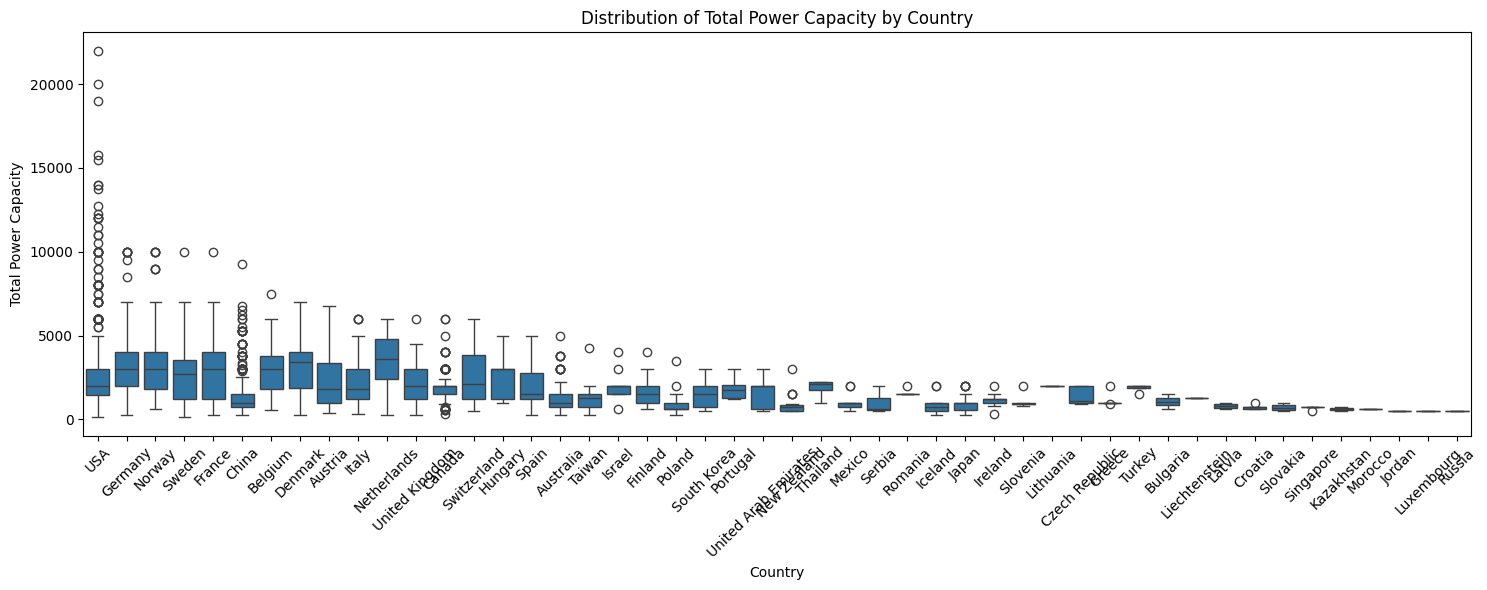

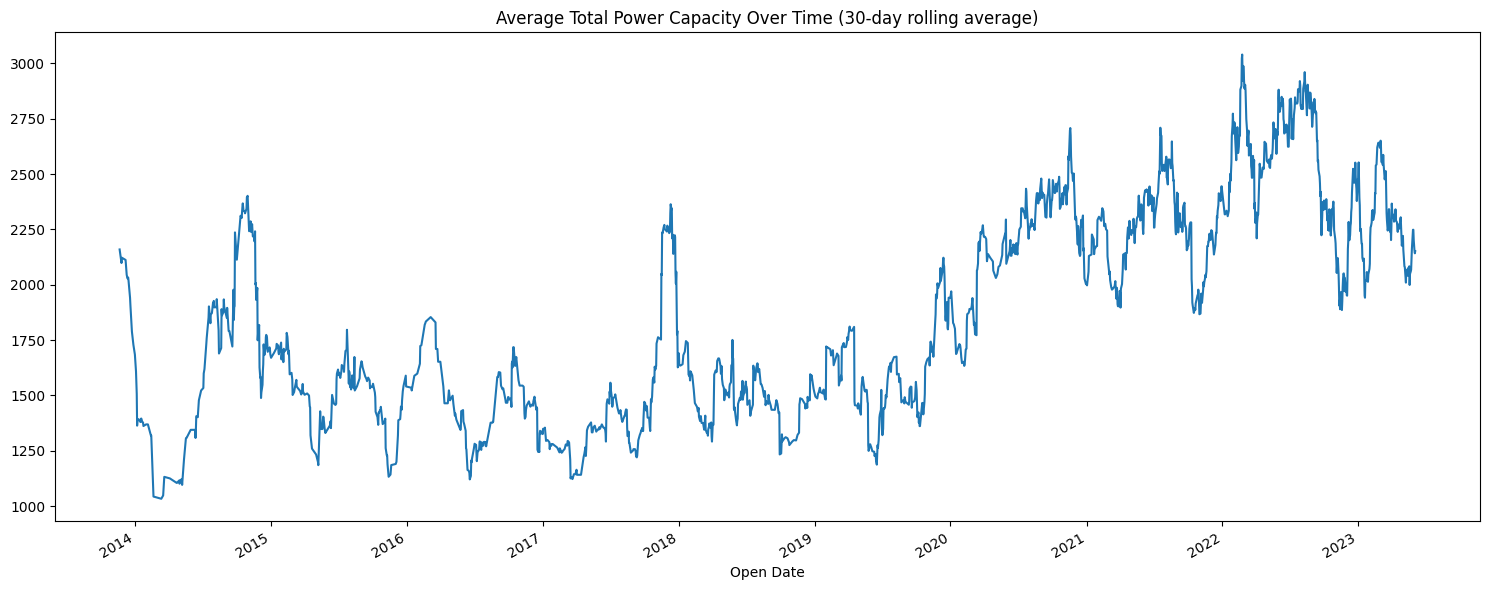

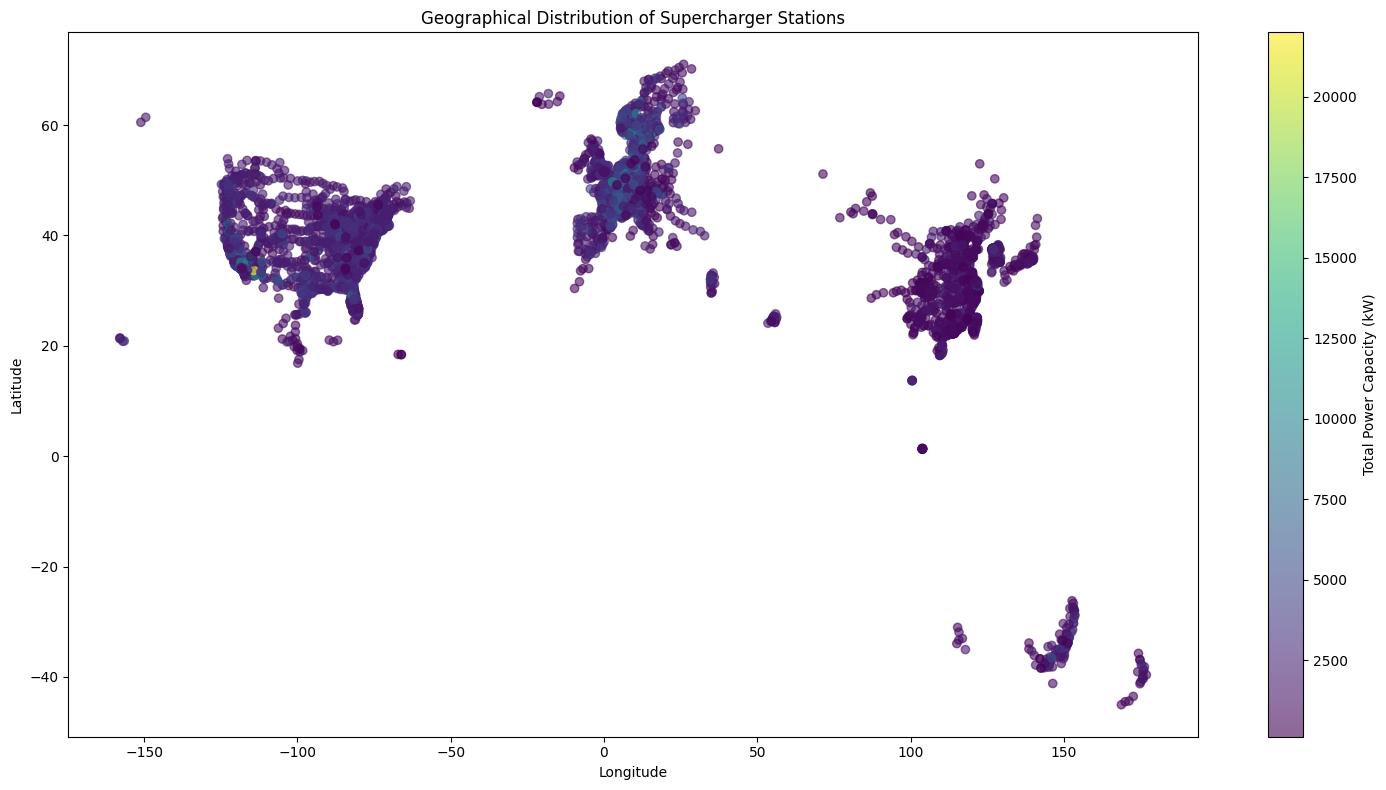

In [15]:
"""
Create various visualizations to analyze the supercharger network

Parameters:
data (DataFrame): Cleaned supercharger data
"""
# Create figure for power distribution by country
plt.figure(figsize=(15, 6))

# Pass 'cleaned_data' as the first positional argument
sns.boxplot(data=cleaned_data.sort_values('Total Power Capacity', ascending=False),
            x='Country', y='Total Power Capacity')

plt.xticks(rotation=45)
plt.title('Distribution of Total Power Capacity by Country')
plt.tight_layout()
plt.show()

# Create figure for power capacity over time
plt.figure(figsize=(15, 6))
cleaned_data.groupby('Open Date')['Total Power Capacity'].mean().rolling(30).mean().plot()
plt.title('Average Total Power Capacity Over Time (30-day rolling average)')
plt.tight_layout()
plt.show()

# Create geographical distribution plot
plt.figure(figsize=(15, 8))
# Use 'cleaned_data' instead of 'data' to access 'Total Power Capacity', 'Longitude', and 'Latitude'
plt.scatter(cleaned_data['Longitude'], cleaned_data['Latitude'],
             c=cleaned_data['Total Power Capacity'], cmap='viridis',
             alpha=0.6)
plt.colorbar(label='Total Power Capacity (kW)')
plt.title('Geographical Distribution of Supercharger Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

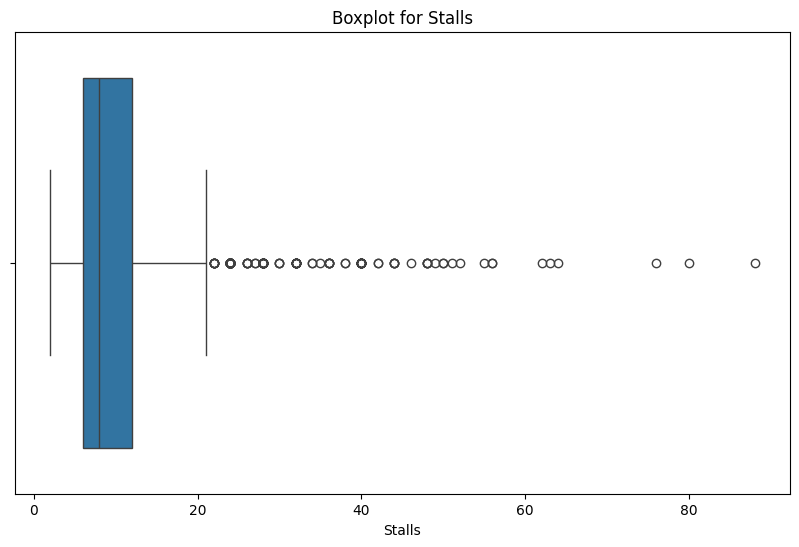

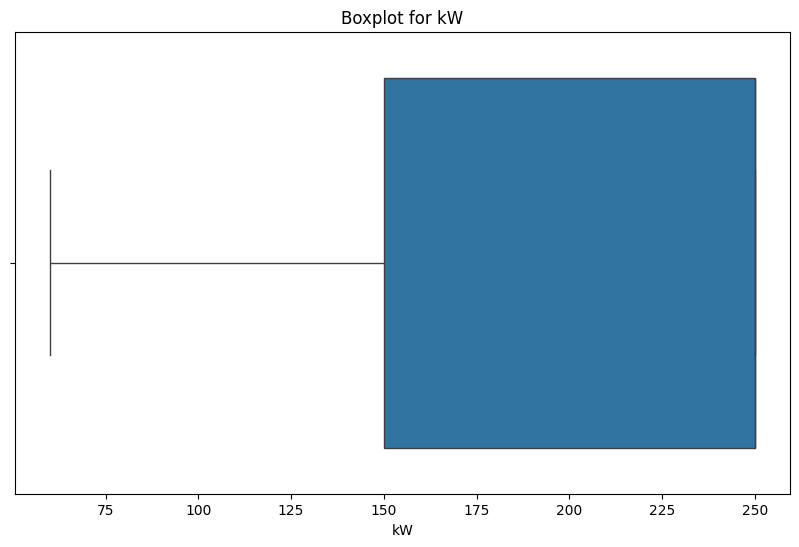

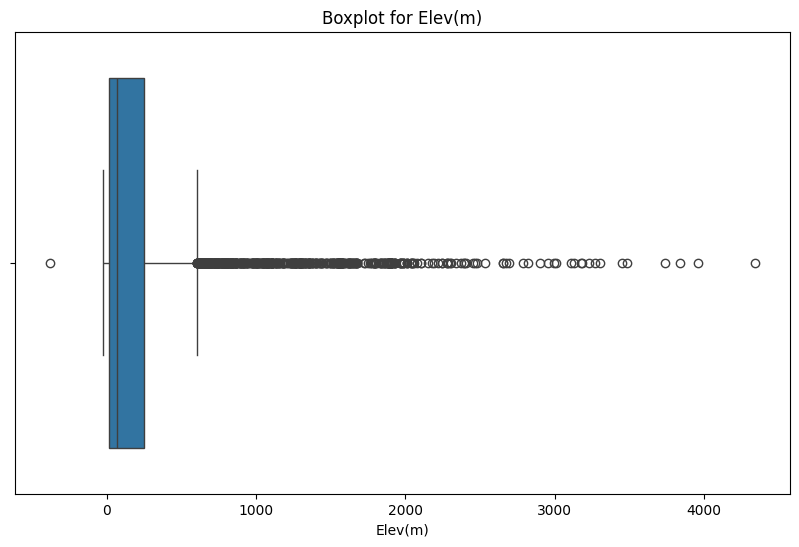

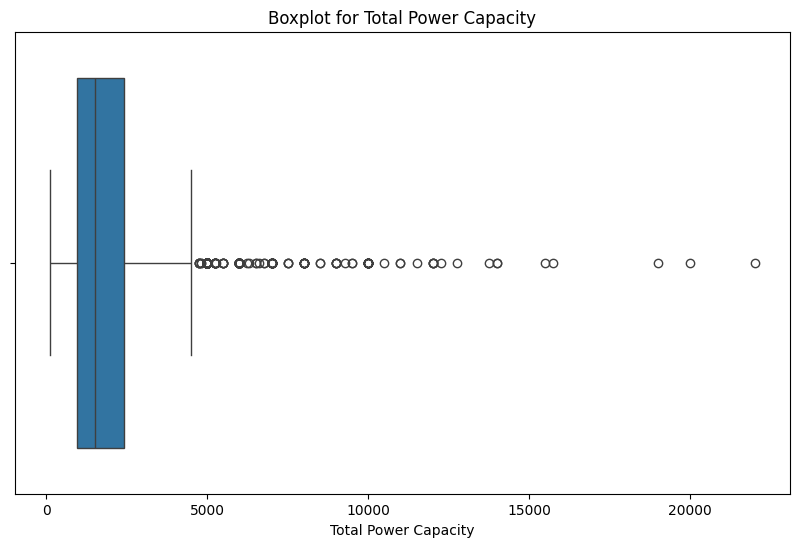

            Stalls           kW      Elev(m)                      Open Date  \
count  5551.000000  5551.000000  5551.000000                           4886   
mean      8.410737   204.007386   228.423888  2020-06-30 23:01:38.731068416   
min       2.000000    60.000000  -380.000000            2012-11-19 00:00:00   
25%       6.000000   150.000000    13.000000            2018-08-29 06:00:00   
50%       8.000000   250.000000    65.000000            2021-03-17 12:00:00   
75%      12.000000   250.000000   248.000000            2022-09-22 00:00:00   
max      40.000000   250.000000  4338.000000            2023-06-03 00:00:00   
std       4.000800    59.497201   421.791658                            NaN   

          Latitude    Longitude  Total Power Capacity  
count  5551.000000  5551.000000           5551.000000  
mean     36.226127     7.924032           1716.237615  
min     -45.026352  -157.941632            120.000000  
25%      30.610184   -83.797529            900.000000  
50%     

In [19]:
# Function to remove outliers using IQR
def remove_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Visualize outliers
def plot_outliers(df, column):
  plt.figure(figsize=(10, 6))
  sns.boxplot(x=df[column])
  plt.title(f'Boxplot for {column}')
  plt.show()

# Plot and remove outliers for each column
for i in range(100):
  for column in ['Stalls', 'kW', 'Elev(m)', 'Total Power Capacity']:
    cleaned_data1 = remove_outliers(cleaned_data, column)

for column in ['Stalls', 'kW', 'Elev(m)', 'Total Power Capacity']:
  plot_outliers(cleaned_data, column)

# Display the cleaned data
print(cleaned_data1.describe())

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Select relevant features
features = ['Stalls', 'kW', 'Elev(m)', 'Latitude', 'Longitude', 'Total Power Capacity','Country']
model_data = cleaned_data[features].dropna()

# Calculate IQR for outlier detection
Q1 = model_data['Total Power Capacity'].quantile(0.25)
Q3 = model_data['Total Power Capacity'].quantile(0.75)
IQR = Q3 - Q1


# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
filtered_data = model_data[(model_data['Total Power Capacity'] >= lower_bound) &
                         (model_data['Total Power Capacity'] <= upper_bound)]

# Split features and target
X = filtered_data.drop('Total Power Capacity', axis=1)
y = filtered_data['Total Power Capacity']

X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for compatibility with StandardScaler

# Fit and transform the encoder on the 'Country' column
encoded_country = encoder.fit_transform(X[['Country']])

# Create a DataFrame from the encoded features
encoded_country_df = pd.DataFrame(encoded_country, columns=encoder.get_feature_names_out(['Country']))

# Drop the original 'Country' column and concatenate the encoded features
X = X.drop('Country', axis=1)
X = pd.concat([X, encoded_country_df], axis=1)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

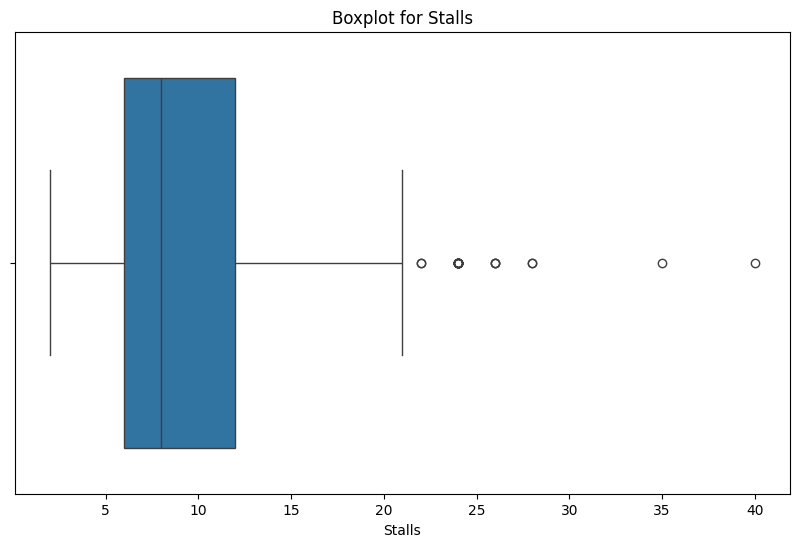

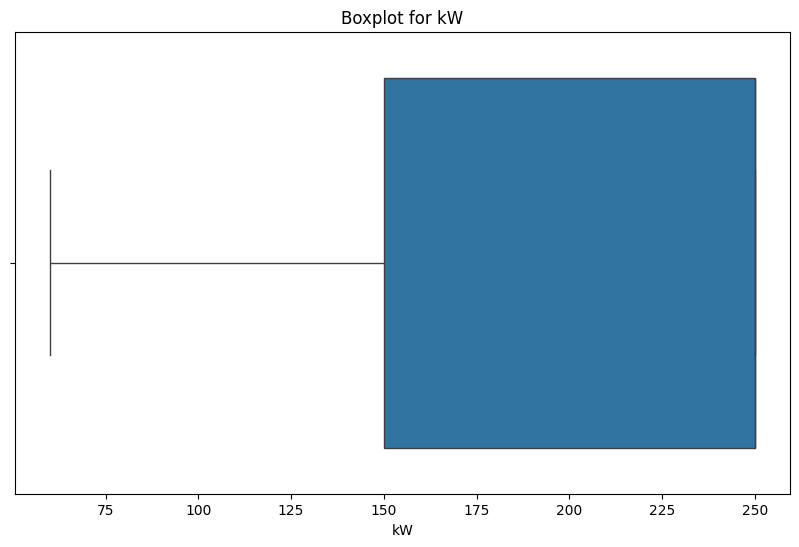

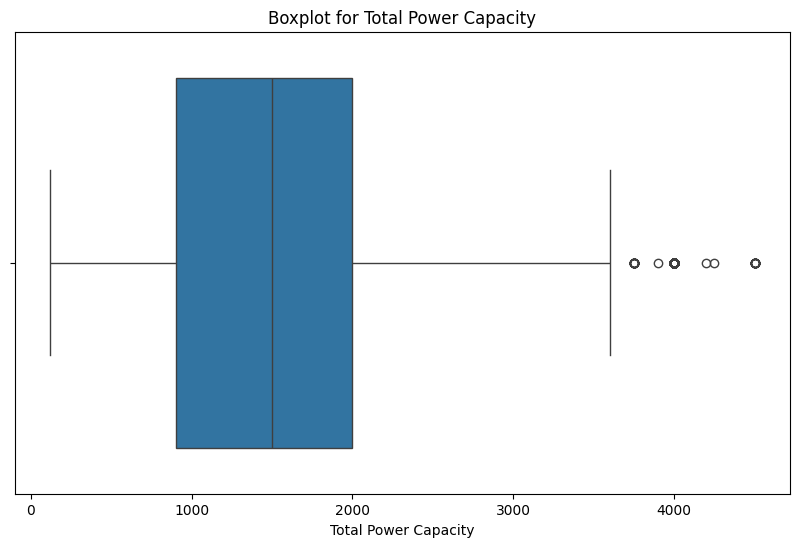

In [44]:
# Visualize outliers
def plot_outliers(df, column):
  plt.figure(figsize=(10, 6))
  sns.boxplot(x=df[column])
  plt.title(f'Boxplot for {column}')
  plt.show()

for column in ['Stalls','kW', 'Total Power Capacity']:
  plot_outliers(filtered_data, column)

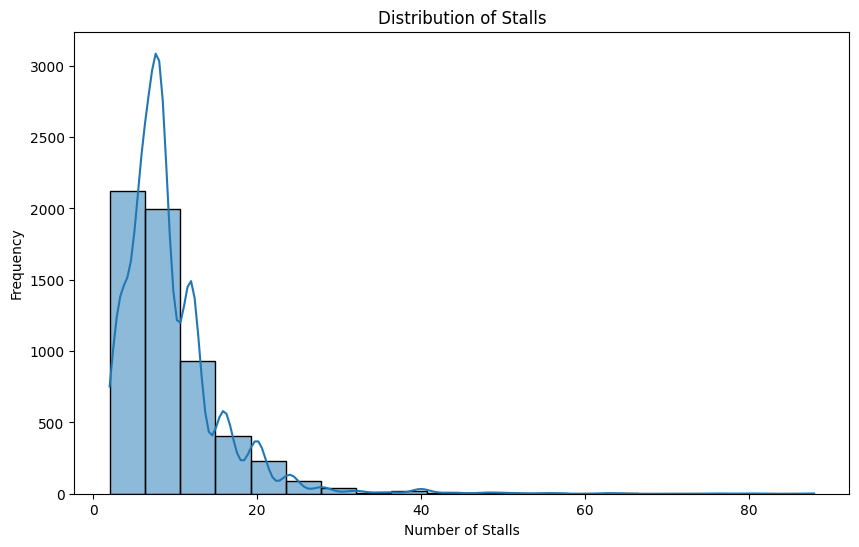

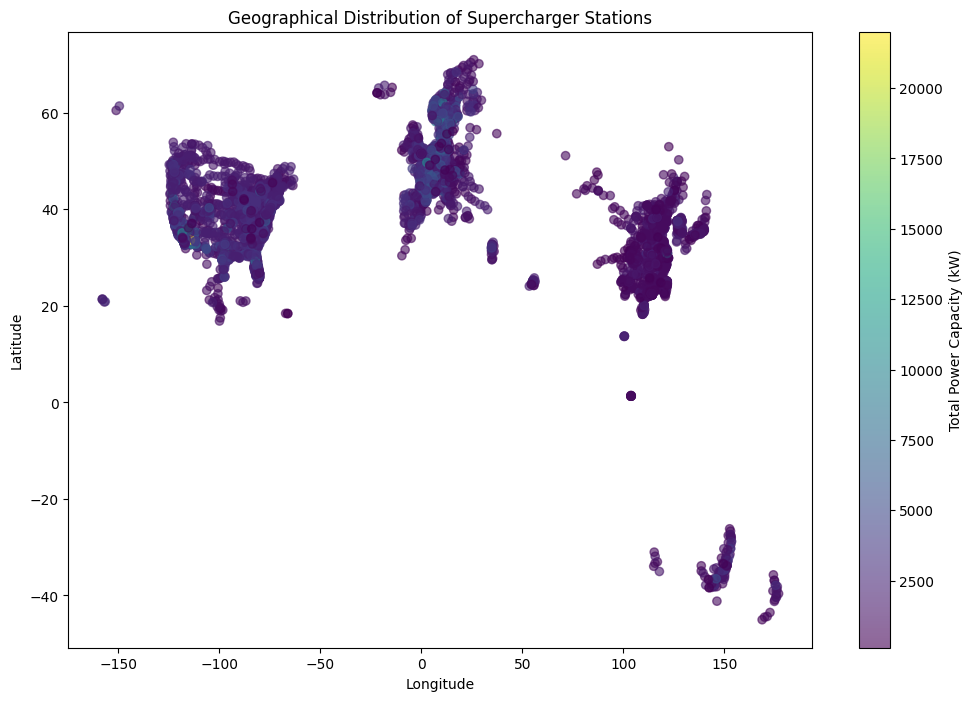

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(model_data['Stalls'].dropna(), bins=20, kde=True)
plt.title('Distribution of Stalls')
plt.xlabel('Number of Stalls')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 8))
plt.scatter(model_data['Longitude'], model_data['Latitude'], c=model_data['Total Power Capacity'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Total Power Capacity (kW)')
plt.title('Geographical Distribution of Supercharger Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
      X_scaled, y, test_size=0.2, random_state=42
  )

# Random Forest

In [75]:
# Import additional libraries for optimization
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# 1. Default Random Forest
rf_default = RandomForestRegressor(max_depth=2,random_state=12)
rf_default.fit(X_train, y_train)
rf_default_pred = rf_default.predict(X_test)

# 2. Default Gradient Boosting
gb_default = GradientBoostingRegressor(max_depth=1,random_state=12)
gb_default.fit(X_train, y_train)
gb_default_pred = gb_default.predict(X_test)

# 3. Default SVM
svm_default = SVR()
svm_default.fit(X_train, y_train)
svm_default_pred = svm_default.predict(X_test)

# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
  return {
      'R2': r2_score(y_true, y_pred),
      'MSE': mean_squared_error(y_true, y_pred),
      'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
      'MAE': mean_absolute_error(y_true, y_pred)
  }

# Calculate default metrics
default_metrics = {
  'Random Forest': calculate_metrics(y_test, rf_default_pred),
  'Gradient Boosting': calculate_metrics(y_test, gb_default_pred),
  'SVM': calculate_metrics(y_test, svm_default_pred)
}

# Display default metrics
default_df = pd.DataFrame(default_metrics).round(4)
print("\nDefault Model Metrics:")
print(default_df)


Default Model Metrics:
      Random Forest  Gradient Boosting          SVM
R2           0.8111             0.9584       0.1520
MSE     182442.6392         40155.4643  818896.3579
RMSE       427.1330           200.3883     904.9289
MAE        376.5513           127.6184     689.9524


Text(0, 0.5, 'Latitude')

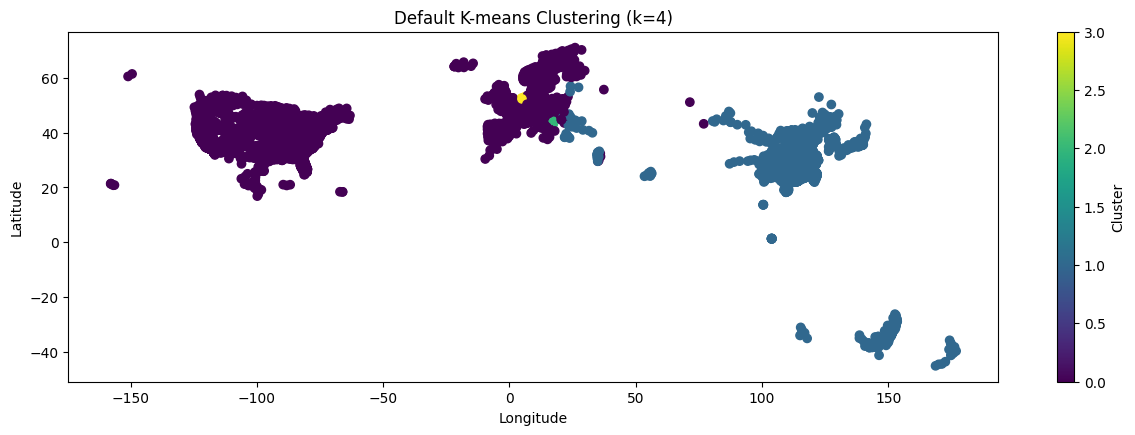

In [53]:
# K-means Clustering Analysis

# 1. Default K-means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Function to evaluate clustering
def evaluate_clustering(data, labels):
  return {
      'silhouette': silhouette_score(data, labels),
      'calinski_harabasz': calinski_harabasz_score(data, labels)
  }

# Default K-means with k=4
kmeans_default = KMeans(n_clusters=4, random_state=42)
default_clusters = kmeans_default.fit_predict(X_scaled)

# Calculate default metrics
default_cluster_metrics = evaluate_clustering(X_scaled, default_clusters)

# Visualize default clustering results
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.scatter(X['Longitude'], X['Latitude'],
         c=default_clusters, cmap='viridis')
plt.title('Default K-means Clustering (k=4)')
plt.colorbar(label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [57]:
# 1. Random Forest Optimization
rf_param_grid = {
  'n_estimators': [100, 200, 300],
  'max_depth': [10, 20, 30, None],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(RandomForestRegressor(random_state=42),
                    rf_param_grid, cv=5, scoring='r2')
rf_grid.fit(X_train, y_train)
rf_optimized = rf_grid.best_estimator_
rf_optimized_pred = rf_optimized.predict(X_test)

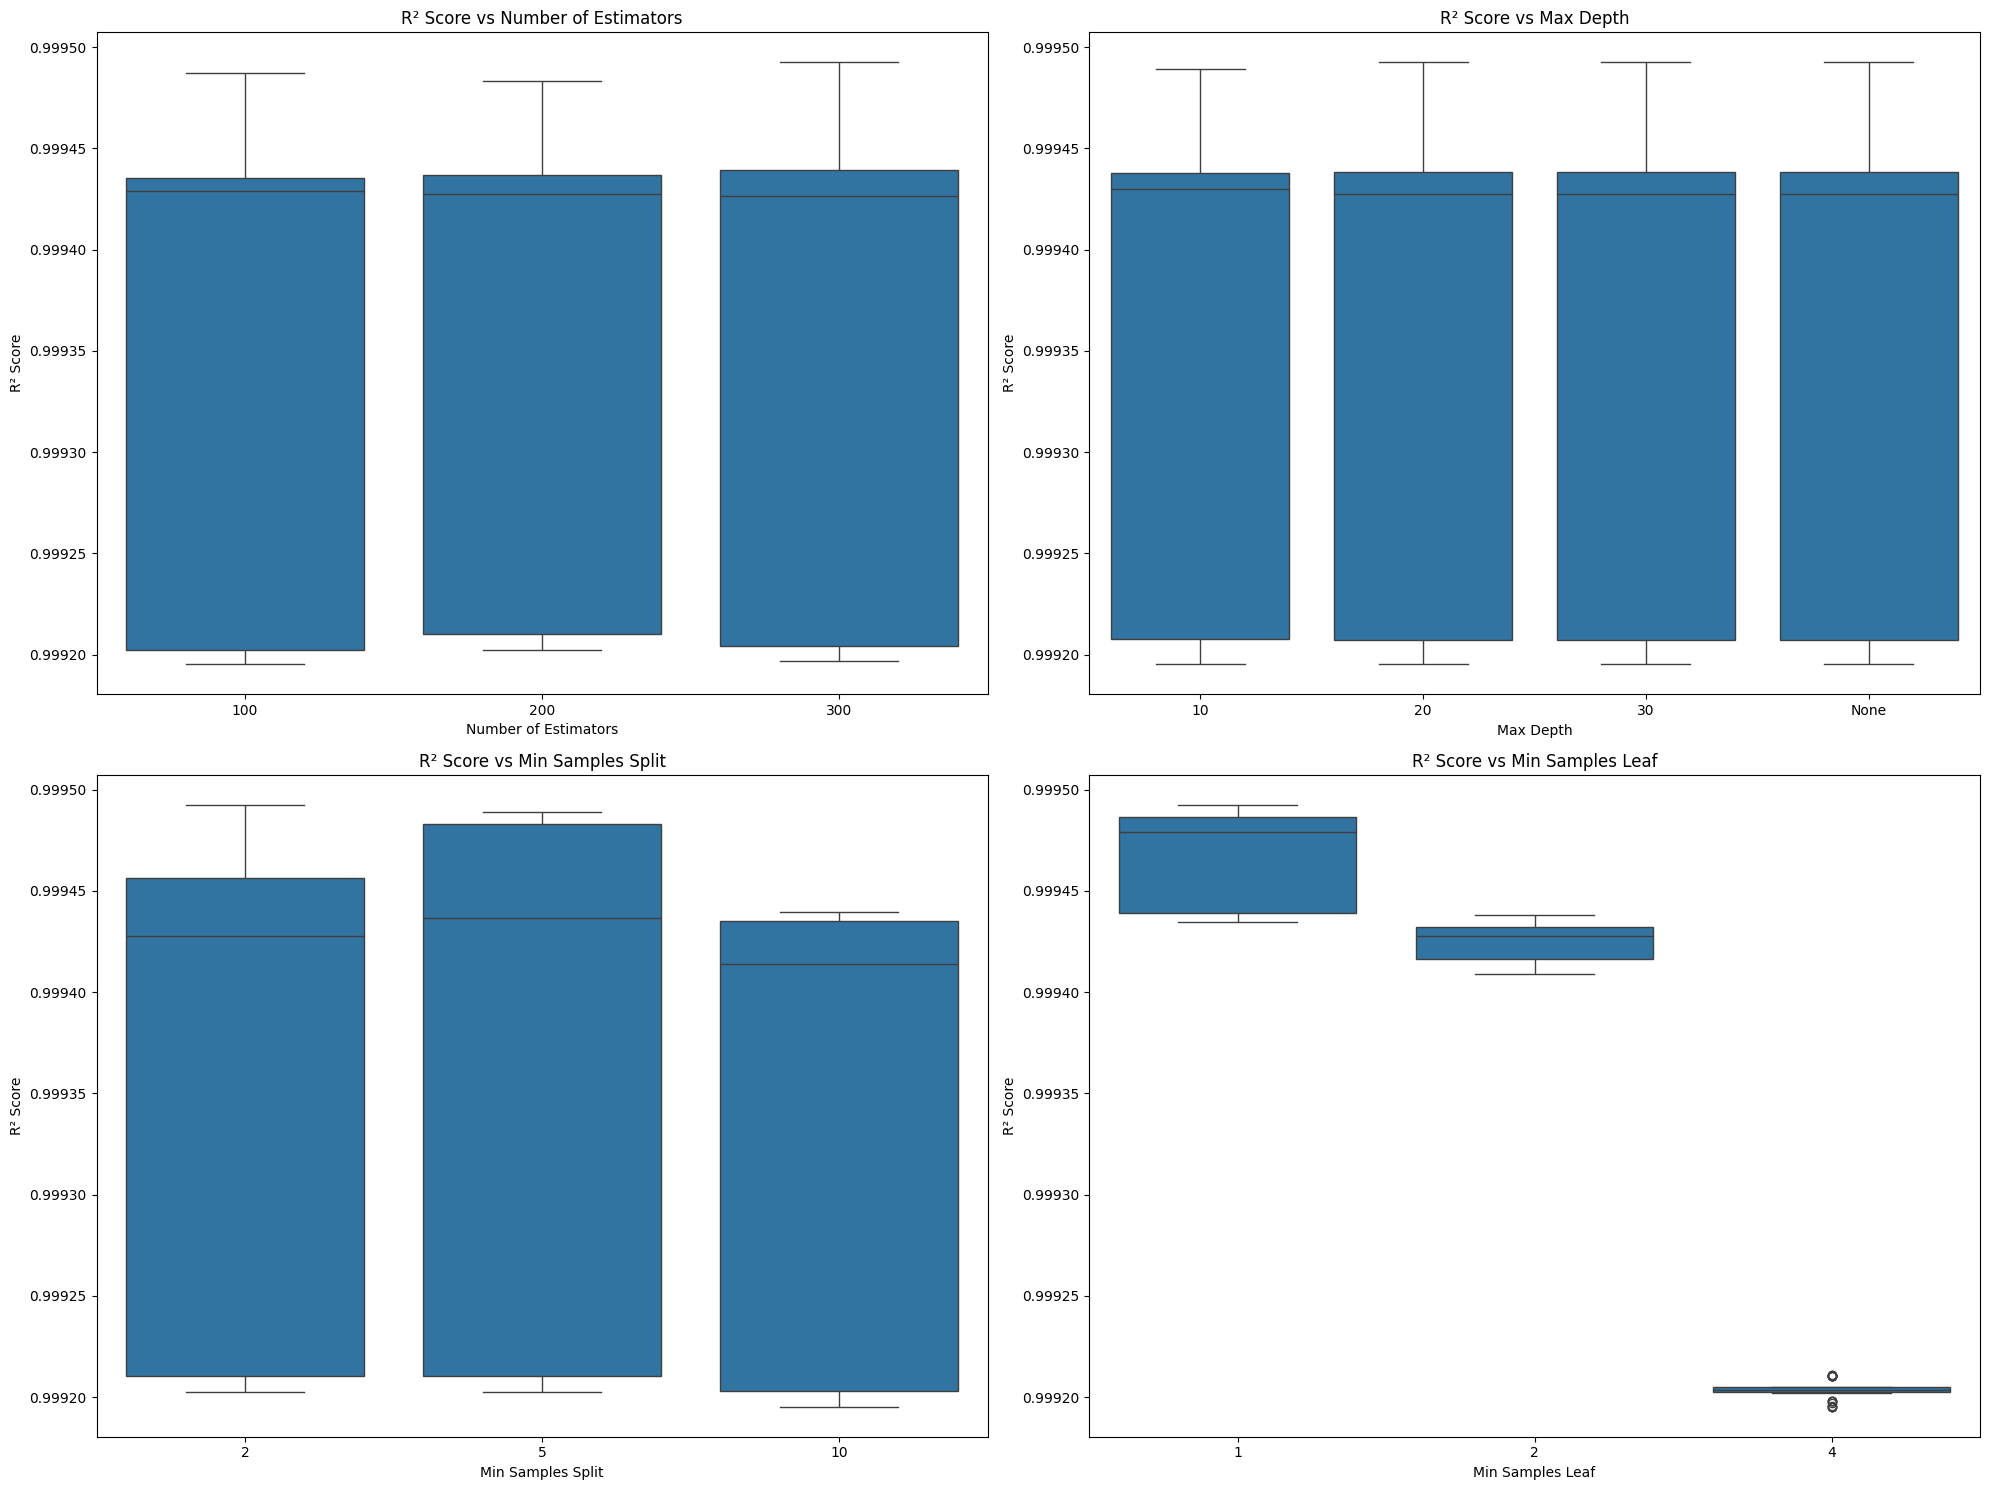

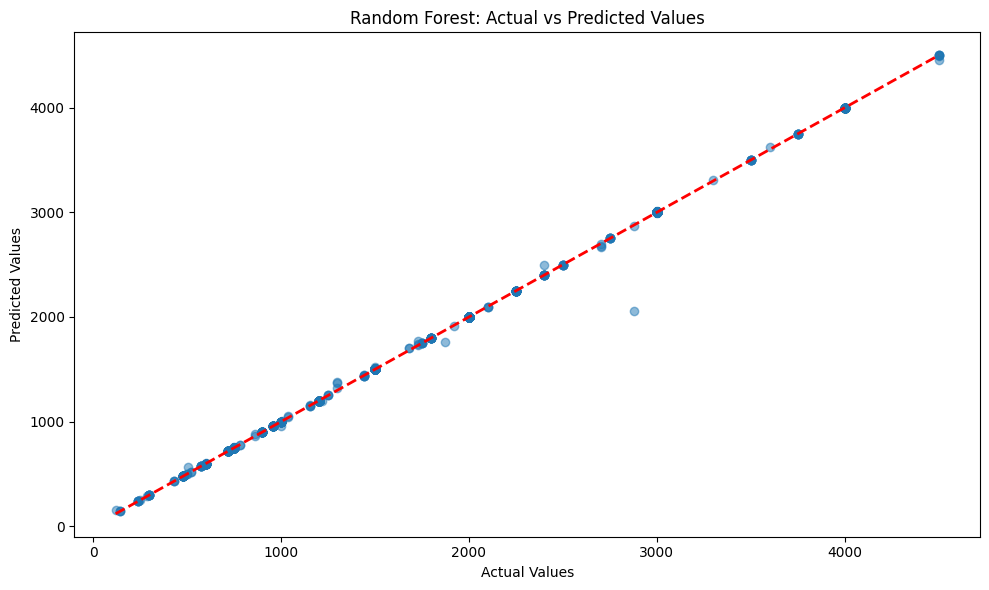


Best Parameters:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Best Score: 0.9995


In [70]:
# Extract results from GridSearchCV
results = pd.DataFrame(rf_grid.cv_results_)

# Create figure with multiple subplots
plt.figure(figsize=(20, 15))

# 1. Plot R² scores for different n_estimators
plt.subplot(2, 2, 1)
sns.boxplot(x='param_n_estimators', y='mean_test_score', data=results)
plt.title('R² Score vs Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('R² Score')

# 2. Plot R² scores for different max_depth
plt.subplot(2, 2, 2)
# Convert 'None' to string for plotting
results['param_max_depth'] = results['param_max_depth'].astype(str)
sns.boxplot(x='param_max_depth', y='mean_test_score', data=results)
plt.title('R² Score vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('R² Score')

# 3. Plot R² scores for different min_samples_split
plt.subplot(2, 2, 3)
sns.boxplot(x='param_min_samples_split', y='mean_test_score', data=results)
plt.title('R² Score vs Min Samples Split')
plt.xlabel('Min Samples Split')
plt.ylabel('R² Score')

# 4. Plot R² scores for different min_samples_leaf
plt.subplot(2, 2, 4)
sns.boxplot(x='param_min_samples_leaf', y='mean_test_score', data=results)
plt.title('R² Score vs Min Samples Leaf')
plt.xlabel('Min Samples Leaf')
plt.ylabel('R² Score')

plt.tight_layout()
plt.show()

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_optimized_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest: Actual vs Predicted Values')
plt.tight_layout()
plt.show()

# Print best parameters
print("\nBest Parameters:")
print(rf_grid.best_params_)
print("\nBest Score:", round(rf_grid.best_score_, 4))

In [56]:
# 2. Gradient Boosting Optimization
gb_param_grid = {
  'n_estimators': [100, 200, 300],
  'learning_rate': [0.01, 0.1, 0.3],
  'max_depth': [3, 4, 5],
  'min_samples_split': [2, 4]
}

gb_grid = GridSearchCV(GradientBoostingRegressor(random_state=42),
                    gb_param_grid, cv=5, scoring='r2')
gb_grid.fit(X_train, y_train)
gb_optimized = gb_grid.best_estimator_
gb_optimized_pred = gb_optimized.predict(X_test)

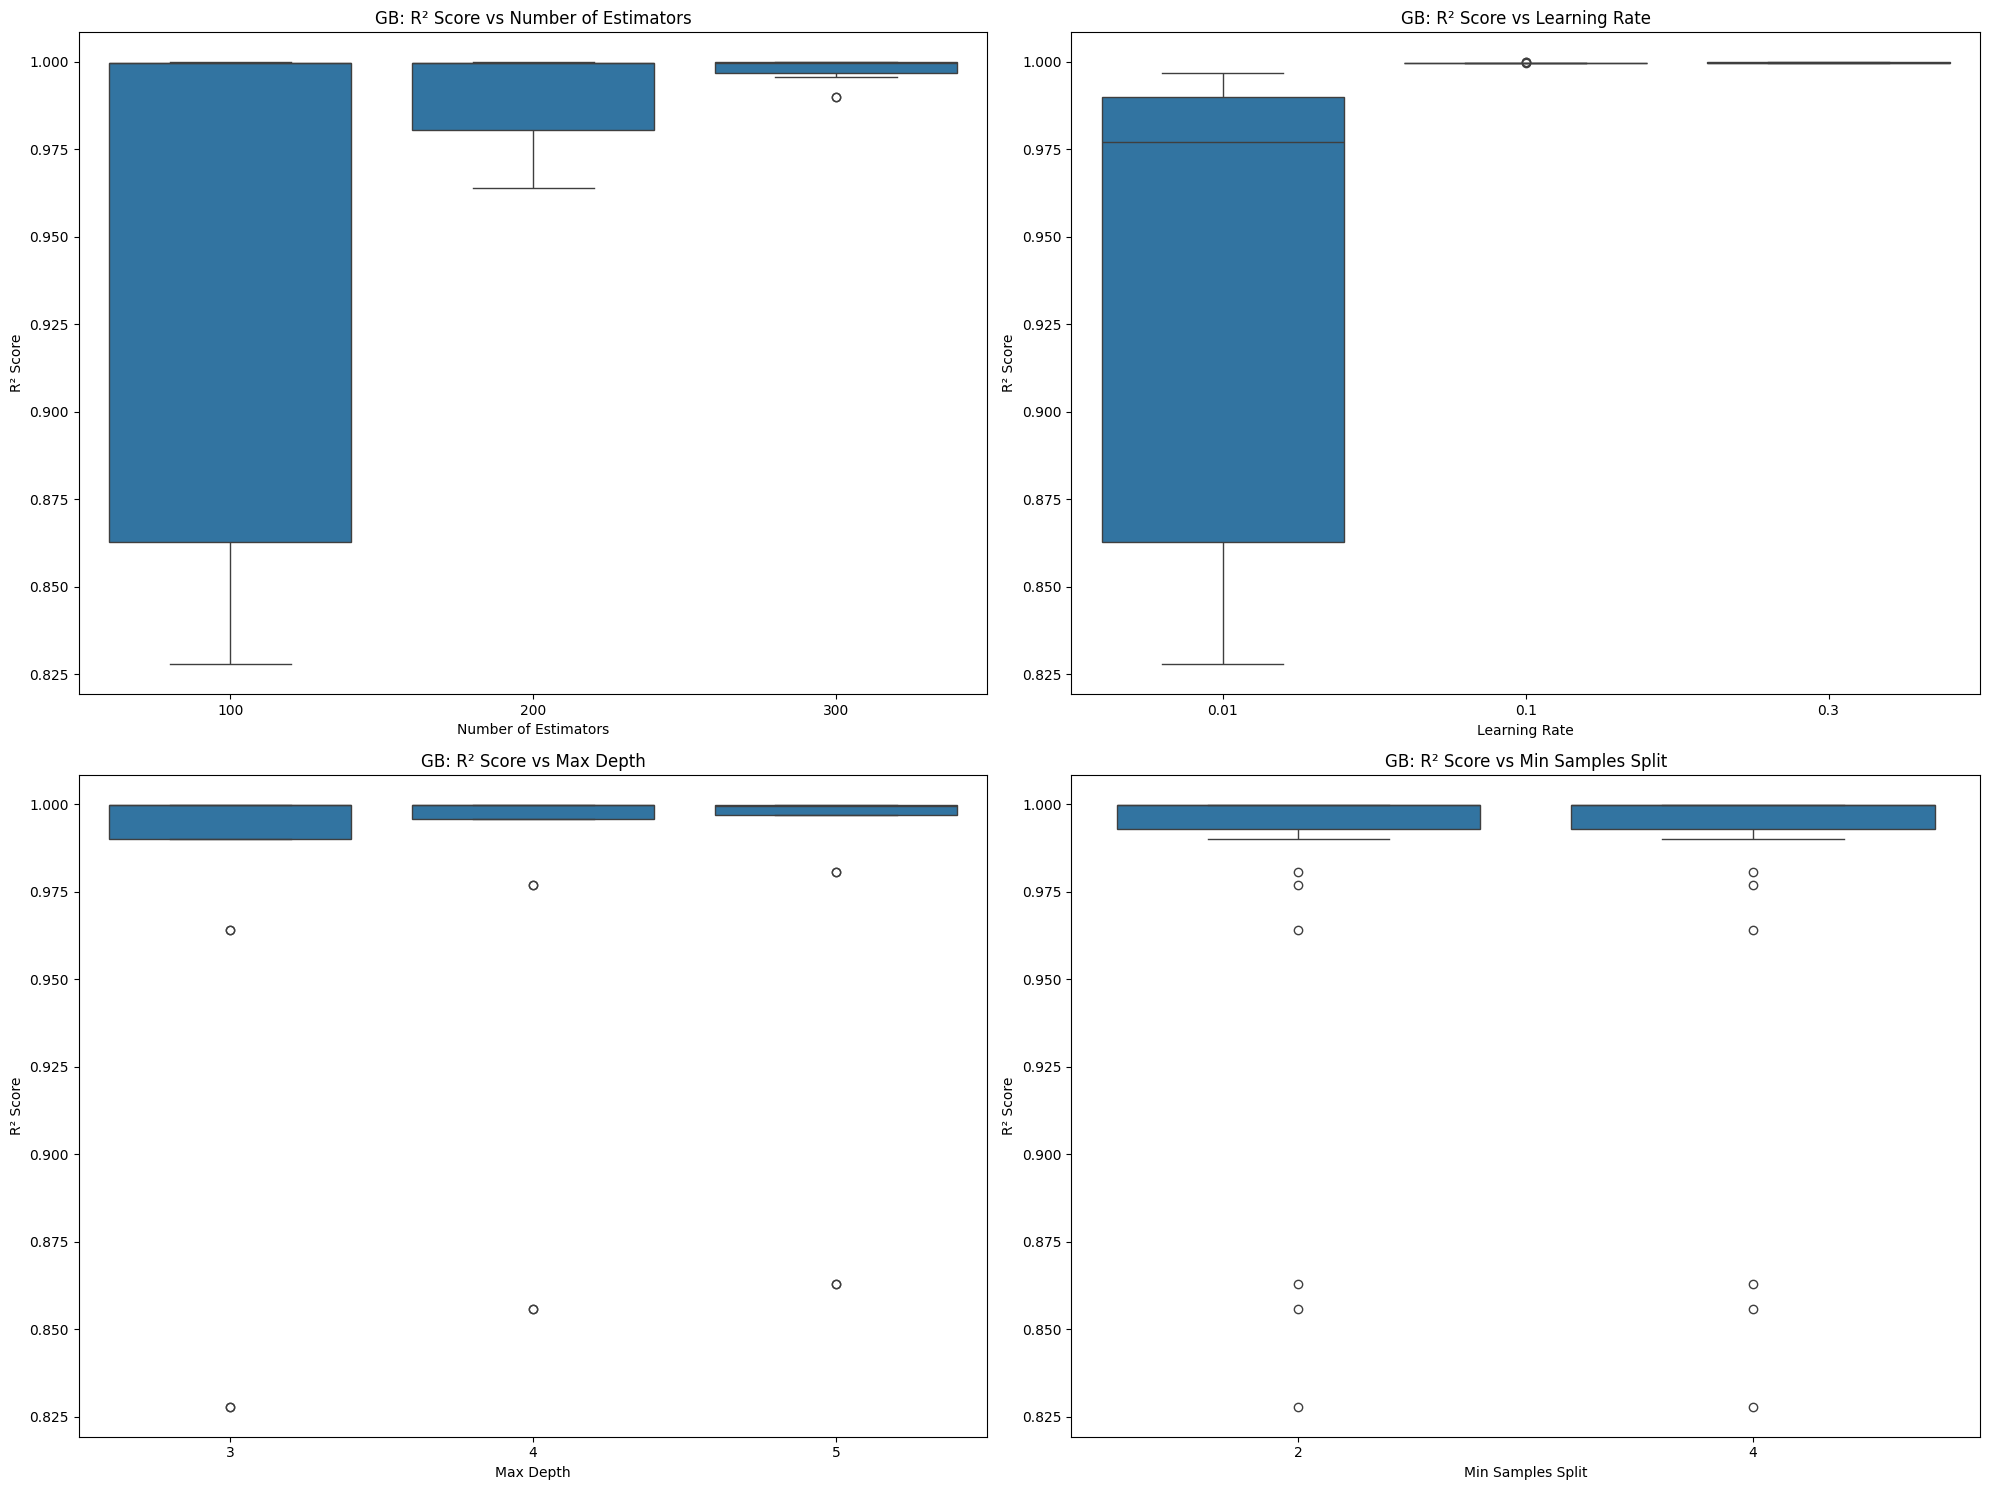

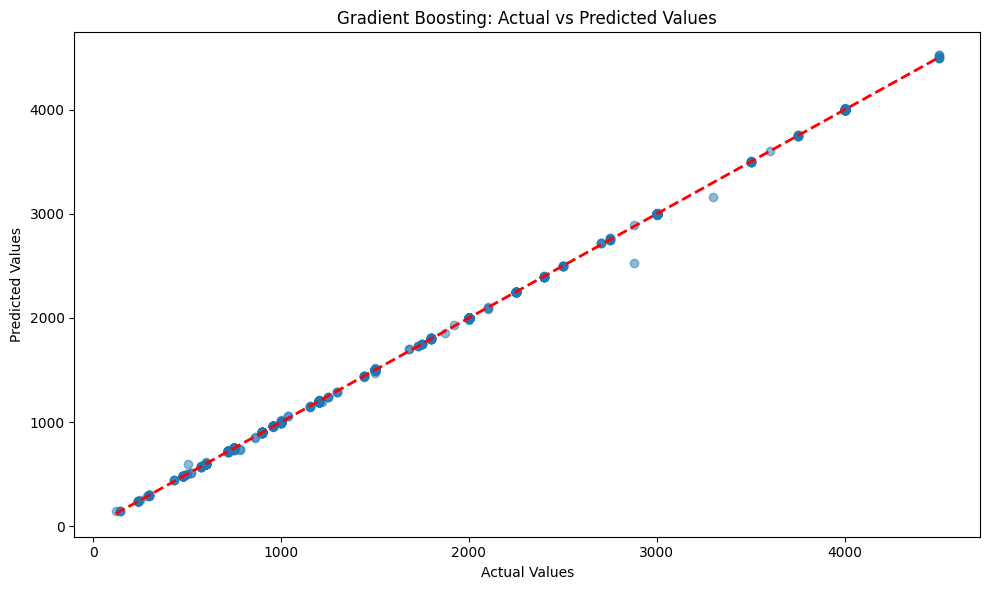


Gradient Boosting Best Parameters:
{'learning_rate': 0.3, 'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 300}
Best Score: 0.9998


In [73]:
# Create figure for Gradient Boosting results
plt.figure(figsize=(20, 15))
results_gb = pd.DataFrame(gb_grid.cv_results_)

# 1. Plot R² scores for different n_estimators
plt.subplot(2, 2, 1)
sns.boxplot(x='param_n_estimators', y='mean_test_score', data=results_gb)
plt.title('GB: R² Score vs Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('R² Score')

# 2. Plot R² scores for different learning_rate
plt.subplot(2, 2, 2)
sns.boxplot(x='param_learning_rate', y='mean_test_score', data=results_gb)
plt.title('GB: R² Score vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('R² Score')

# 3. Plot R² scores for different max_depth
plt.subplot(2, 2, 3)
sns.boxplot(x='param_max_depth', y='mean_test_score', data=results_gb)
plt.title('GB: R² Score vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('R² Score')

# 4. Plot R² scores for different min_samples_split
plt.subplot(2, 2, 4)
sns.boxplot(x='param_min_samples_split', y='mean_test_score', data=results_gb)
plt.title('GB: R² Score vs Min Samples Split')
plt.xlabel('Min Samples Split')
plt.ylabel('R² Score')

plt.tight_layout()
plt.show()

# Actual vs Predicted plot for Gradient Boosting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, gb_optimized_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Gradient Boosting: Actual vs Predicted Values')
plt.tight_layout()
plt.show()

# Print Gradient Boosting best parameters
print("\nGradient Boosting Best Parameters:")
print(gb_grid.best_params_)
print("Best Score:", round(gb_grid.best_score_, 4))

In [74]:
# 3. SVM Optimization
svm_param_grid = {
  'C': [0.1, 1, 10],
  'gamma': ['scale', 'auto', 0.1, 0.01],
  'kernel': ['rbf', 'linear']
}

svm_grid = GridSearchCV(SVR(), svm_param_grid, cv=5, scoring='r2')
svm_grid.fit(X_train, y_train)
svm_optimized = svm_grid.best_estimator_
svm_optimized_pred = svm_optimized.predict(X_test)

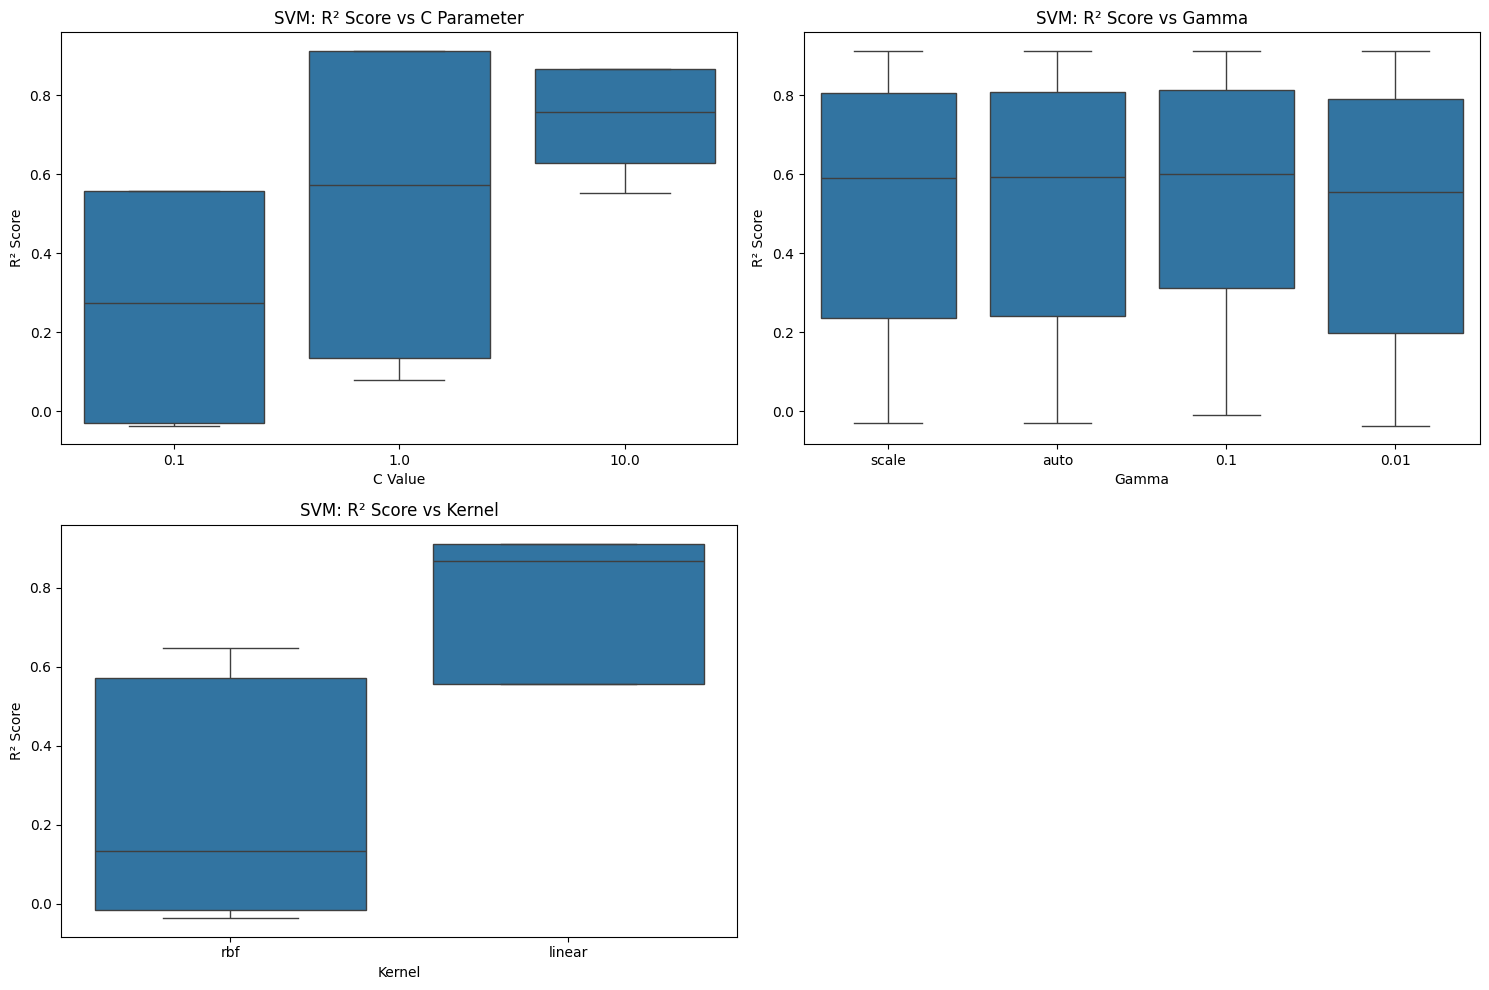

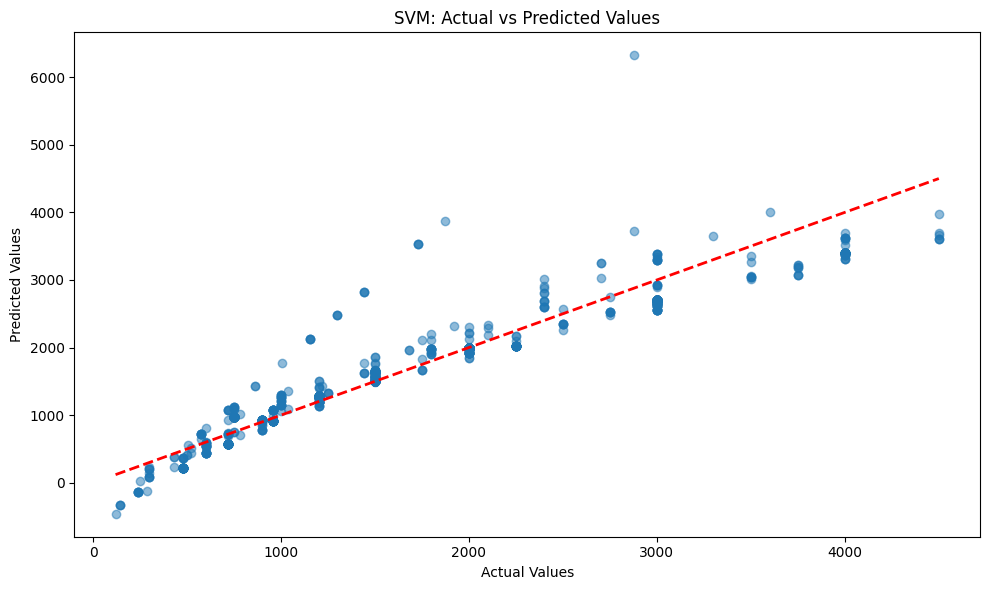


SVM Best Parameters:
{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best Score: 0.9115


In [76]:
plt.figure(figsize=(15, 10))
results_svm = pd.DataFrame(svm_grid.cv_results_)

# 1. Plot R² scores for different C values
plt.subplot(2, 2, 1)
sns.boxplot(x='param_C', y='mean_test_score', data=results_svm)
plt.title('SVM: R² Score vs C Parameter')
plt.xlabel('C Value')
plt.ylabel('R² Score')

# 2. Plot R² scores for different gamma values
plt.subplot(2, 2, 2)
sns.boxplot(x='param_gamma', y='mean_test_score', data=results_svm)
plt.title('SVM: R² Score vs Gamma')
plt.xlabel('Gamma')
plt.ylabel('R² Score')

# 3. Plot R² scores for different kernels
plt.subplot(2, 2, 3)
sns.boxplot(x='param_kernel', y='mean_test_score', data=results_svm)
plt.title('SVM: R² Score vs Kernel')
plt.xlabel('Kernel')
plt.ylabel('R² Score')

plt.tight_layout()
plt.show()

# Actual vs Predicted plot for SVM
plt.figure(figsize=(10, 6))
plt.scatter(y_test, svm_optimized_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVM: Actual vs Predicted Values')
plt.tight_layout()
plt.show()

# Print SVM best parameters
print("\nSVM Best Parameters:")
print(svm_grid.best_params_)
print("Best Score:", round(svm_grid.best_score_, 4))

In [59]:
# Calculate optimized metrics
optimized_metrics = {
  'Random Forest': calculate_metrics(y_test, rf_optimized_pred),
  'Gradient Boosting': calculate_metrics(y_test, gb_optimized_pred),
  'SVM': calculate_metrics(y_test, svm_optimized_pred)
}

# Display optimized metrics
optimized_df = pd.DataFrame(optimized_metrics).round(4)
print("\nOptimized Model Metrics:")
print(optimized_df)


Optimized Model Metrics:
      Random Forest  Gradient Boosting         SVM
R2           0.9993             0.9998      0.9027
MSE        657.8305           156.7533  93993.9994
RMSE        25.6482            12.5201    306.5844
MAE          1.6297             2.3004    189.6670


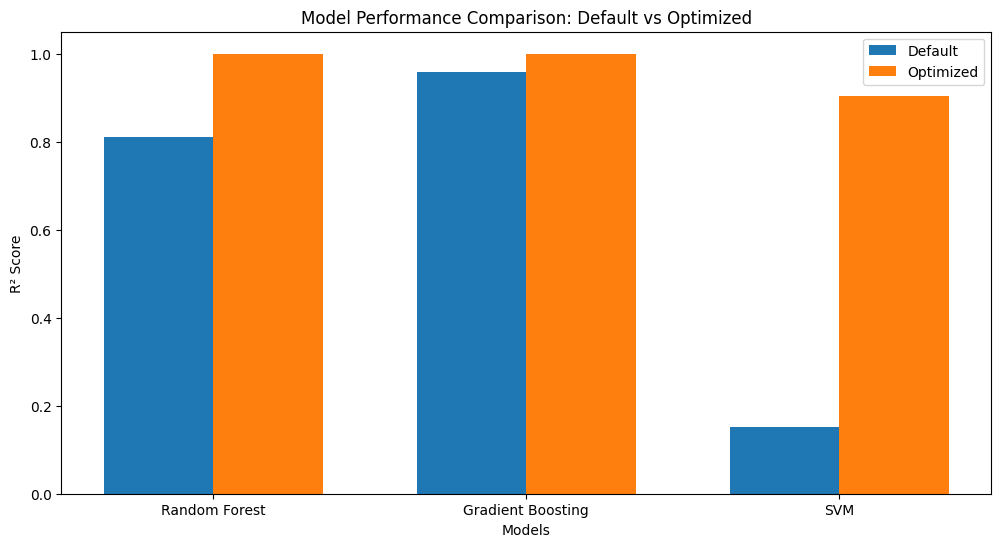

In [66]:
# Visualization of improvements
plt.figure(figsize=(12, 6))
models = ['Random Forest', 'Gradient Boosting', 'SVM']
default_r2 = [default_metrics[m]['R2'] for m in models]
optimized_r2 = [optimized_metrics[m]['R2'] for m in models]

x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, default_r2, width, label='Default')
plt.bar(x + width/2, optimized_r2, width, label='Optimized')
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.title('Model Performance Comparison: Default vs Optimized')
plt.xticks(x, models)
plt.legend()
plt.show()

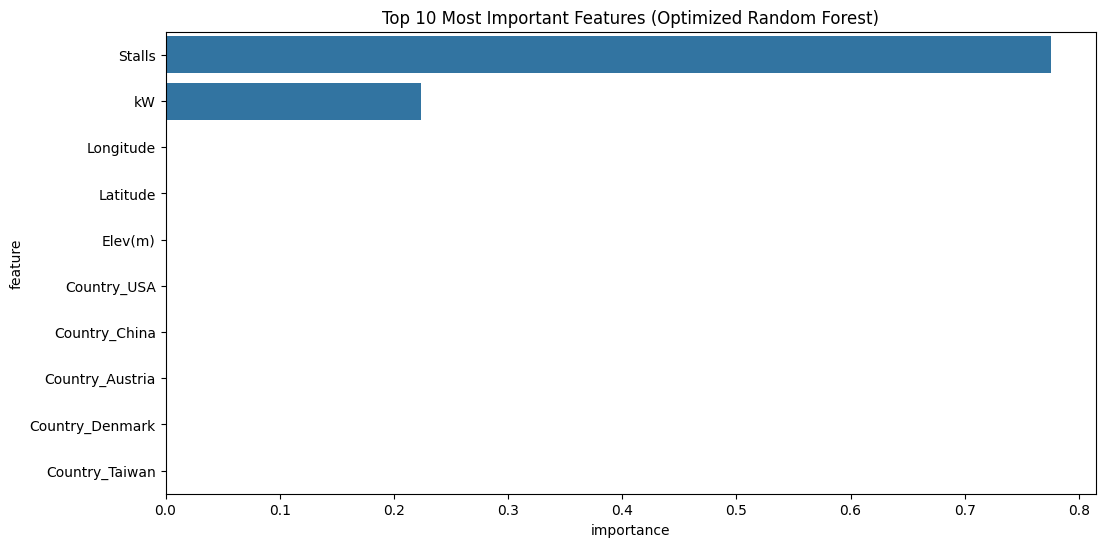

In [60]:
# Feature importance analysis with optimized Random Forest
feature_importance = pd.DataFrame({
  'feature': X.columns,
  'importance': rf_optimized.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Most Important Features (Optimized Random Forest)')
plt.show()